# Task 2: Quantitative Analysis using PyNance and TA-Lib

This notebook performs comprehensive quantitative analysis on stock price data using technical indicators and financial metrics.

## Analysis Components:
1. **Data Loading**: Load stock price data from local CSV files or yfinance
2. **Technical Indicators (TA-Lib)**: Moving Averages, RSI, MACD, Bollinger Bands
3. **Financial Metrics (PyNance)**: Returns, Volatility, Sharpe Ratio, Beta, Alpha, Drawdown
4. **Visualization**: Comprehensive charts and analysis
5. **KPI Analysis**: Key Performance Indicators and metrics


## 1. Setup and Imports


In [1]:
import sys
import os
sys.path.append('../scripts')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Import custom modules
from load_stock_data import (
    load_stock_data,
    load_multiple_stocks,
    prepare_stock_data,
    validate_stock_data
)
from technical_indicators import (
    calculate_moving_averages,
    calculate_rsi,
    calculate_macd,
    calculate_bollinger_bands,
    calculate_all_indicators,
    get_indicator_summary
)
from pynance_metrics import (
    calculate_returns,
    calculate_volatility,
    calculate_sharpe_ratio,
    calculate_max_drawdown,
    calculate_beta,
    calculate_alpha,
    calculate_all_metrics,
    get_metrics_summary
)
from visualize_indicators import (
    plot_price_with_indicators,
    plot_returns_analysis,
    plot_risk_metrics,
    plot_indicator_comparison,
    plot_correlation_heatmap
)

print("All modules imported successfully!")


Note: Using manual calculations for technical indicators (TA-Lib and pandas-ta not available).
All modules imported successfully!


## 2. Load Stock Price Data

We'll load stock price data from local CSV files in the `data/Data` folder. Available tickers: AAPL, MSFT, GOOG, META, AMZN, NVDA


In [2]:
# Configuration
TICKER = 'AAPL'  # Options: AAPL, MSFT, GOOG, META, AMZN, NVDA (must have CSV in data/Data folder)
USE_LOCAL_DATA = True  # Set to True to use local CSV files from data/Data folder
DATA_DIR = '../data/Data'  # Directory containing CSV files

# Note: If USE_LOCAL_DATA=True, start_date, end_date, and period are ignored
# Local CSV files contain all available historical data
START_DATE = '2020-01-01'  # Start date for data (only used if USE_LOCAL_DATA=False)
END_DATE = None  # End date (None = today, only used if USE_LOCAL_DATA=False)
PERIOD = '2y'  # Alternative: use period instead of dates (only used if USE_LOCAL_DATA=False)

# Load stock data
print(f"Loading data for {TICKER}...")
if USE_LOCAL_DATA:
    print(f"Using local data from {DATA_DIR} folder...")
stock_df = load_stock_data(
    ticker=TICKER,
    start_date=START_DATE,
    end_date=END_DATE,
    period=PERIOD,
    use_local_data=USE_LOCAL_DATA,
    data_dir=DATA_DIR
)

# Prepare the data
stock_df = prepare_stock_data(stock_df)

print(f"\nData loaded successfully!")
print(f"Shape: {stock_df.shape}")
print(f"\nDate range: {stock_df['date'].min()} to {stock_df['date'].max()}")
print(f"\nColumns: {stock_df.columns.tolist()}")
print(f"\nFirst few rows:")
display(stock_df.head())

# Validate data
validation_report = validate_stock_data(stock_df)
print("\nData Validation Report:")
print("=" * 50)
for key, value in validation_report.items():
    print(f"{key}: {value}")


Loading data for AAPL...
Using local data from ../data/Data folder...
✓ Loaded AAPL data from local CSV file

Data loaded successfully!
Shape: (3774, 10)

Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00

Columns: ['date', 'Close', 'High', 'Low', 'Open', 'Volume', 'ticker', 'price_change', 'price_change_pct', 'typical_price']

First few rows:


,date,Close,High,Low,Open,Volume,ticker,price_change,price_change_pct,typical_price
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200,AAPL,NaN,NaN,2.668703
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400,AAPL,0.114866,4.220416,2.833854
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400,AAPL,-0.046786,-1.649399,2.824956
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800,AAPL,-0.060283,-2.160860,2.736882
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800,AAPL,0.050685,1.856959,2.758076



Data Validation Report:
total_rows: 3774
date_range: {'min': Timestamp('2009-01-02 00:00:00'), 'max': Timestamp('2023-12-29 00:00:00')}
missing_values: {'Open': {'count': 0, 'percentage': 0.0}, 'High': {'count': 0, 'percentage': 0.0}, 'Low': {'count': 0, 'percentage': 0.0}, 'Close': {'count': 0, 'percentage': 0.0}, 'Volume': {'count': 0, 'percentage': 0.0}}
data_quality: {'price_range': {'min': 2.345299482345581, 'max': 196.256591796875, 'mean': 53.84116888223152}, 'volume_stats': {'min': 24048300.0, 'max': 1880998000.0, 'mean': 264063973.90037096}}


## 3. Calculate Technical Indicators using TA-Lib

We'll calculate various technical indicators including Moving Averages, RSI, MACD, and Bollinger Bands.


In [3]:
# Calculate all technical indicators
print("Calculating technical indicators...")
stock_df = calculate_all_indicators(
    stock_df,
    include_moving_averages=True,
    include_rsi=True,
    include_macd=True,
    include_bollinger=True,
    include_stochastic=False
)

print("Technical indicators calculated successfully!")
print(f"\nNew columns added: {[col for col in stock_df.columns if col not in ['Open', 'High', 'Low', 'Close', 'Volume', 'date', 'ticker']]}")

# Display indicator summary
indicator_summary = get_indicator_summary(stock_df)
print("\nIndicator Summary:")
print("=" * 50)
for indicator, stats in indicator_summary.items():
    print(f"\n{indicator}:")
    for key, value in stats.items():
        if value is not None:
            print(f"  {key}: {value:.4f}" if isinstance(value, float) else f"  {key}: {value}")


Calculating technical indicators...
Technical indicators calculated successfully!

New columns added: ['price_change', 'price_change_pct', 'typical_price', 'SMA_20', 'EMA_20', 'SMA_50', 'EMA_50', 'SMA_200', 'EMA_200', 'RSI_14', 'RSI_14_overbought', 'RSI_14_oversold', 'MACD', 'MACD_signal', 'MACD_histogram', 'MACD_bullish', 'MACD_bearish', 'BB_upper_20', 'BB_middle_20', 'BB_lower_20', 'BB_percentB_20', 'BB_squeeze_20']

Indicator Summary:

RSI_14:
  mean: 56.5088
  std: 17.6503
  min: 3.1801
  max: 97.4874
  current: 40.1852

MACD:
  mean: 0.3461
  std: 1.4712
  current: 1.5595

SMA_20:
  mean: 53.6192
  current: 192.4906

EMA_20:
  mean: 53.3662
  current: 191.4263

SMA_50:
  mean: 53.2847
  current: 184.8148

EMA_50:
  mean: 52.6442
  current: 187.1106

SMA_200:
  mean: 51.6950
  current: 177.4521

EMA_200:
  mean: 49.2699
  current: 176.1082


## 4. Calculate Financial Metrics using PyNance

We'll calculate financial metrics including returns, volatility, Sharpe ratio, and other risk metrics.


In [4]:
# Load market data for beta and alpha calculation (using S&P 500 as benchmark)
print("Loading market benchmark data (S&P 500)...")
try:
    market_df = load_stock_data(ticker='^GSPC', start_date=START_DATE, end_date=END_DATE, period=PERIOD, use_local_data=False)
    market_df = prepare_stock_data(market_df)
    market_returns = market_df['returns'] if 'returns' in market_df.columns else None
    
    if market_returns is None:
        market_df = calculate_returns(market_df)
        market_returns = market_df['returns']
    
    print("Market data loaded successfully!")
except Exception as e:
    print(f"Warning: Could not load market data: {e}")
    print("Beta and Alpha calculations will be skipped.")
    market_returns = None

# Calculate all financial metrics
print("\nCalculating financial metrics...")
stock_df = calculate_all_metrics(
    stock_df,
    market_returns=market_returns,
    risk_free_rate=0.02  # 2% annual risk-free rate
)

print("Financial metrics calculated successfully!")

# Display metrics summary
metrics_summary = get_metrics_summary(stock_df)
print("\nFinancial Metrics Summary:")
print("=" * 50)
for metric, stats in metrics_summary.items():
    print(f"\n{metric}:")
    for key, value in stats.items():
        if value is not None:
            if isinstance(value, float):
                if 'return' in key.lower() or 'alpha' in key.lower():
                    print(f"  {key}: {value*100:.2f}%")
                else:
                    print(f"  {key}: {value:.4f}")
            else:
                print(f"  {key}: {value}")


Loading market benchmark data (S&P 500)...
✓ Loaded ^GSPC data from yfinance
Market data loaded successfully!

Calculating financial metrics...
Financial metrics calculated successfully!

Financial Metrics Summary:

returns:
  mean_daily: 0.0013
  std_daily: 0.0180
  total_return: 6907.74%
  annualized_return: 38.35%

volatility_30_annualized:
  mean: 0.2657
  current: 0.1269

sharpe_ratio_252:
  mean: 1.0813
  current: 2.1099

max_drawdown:
  worst: -43.7971
  current: -43.7971


## 5. Visualizations

Create comprehensive visualizations to understand the data and indicators.


Figure saved to ../outputs/price_with_indicators.png


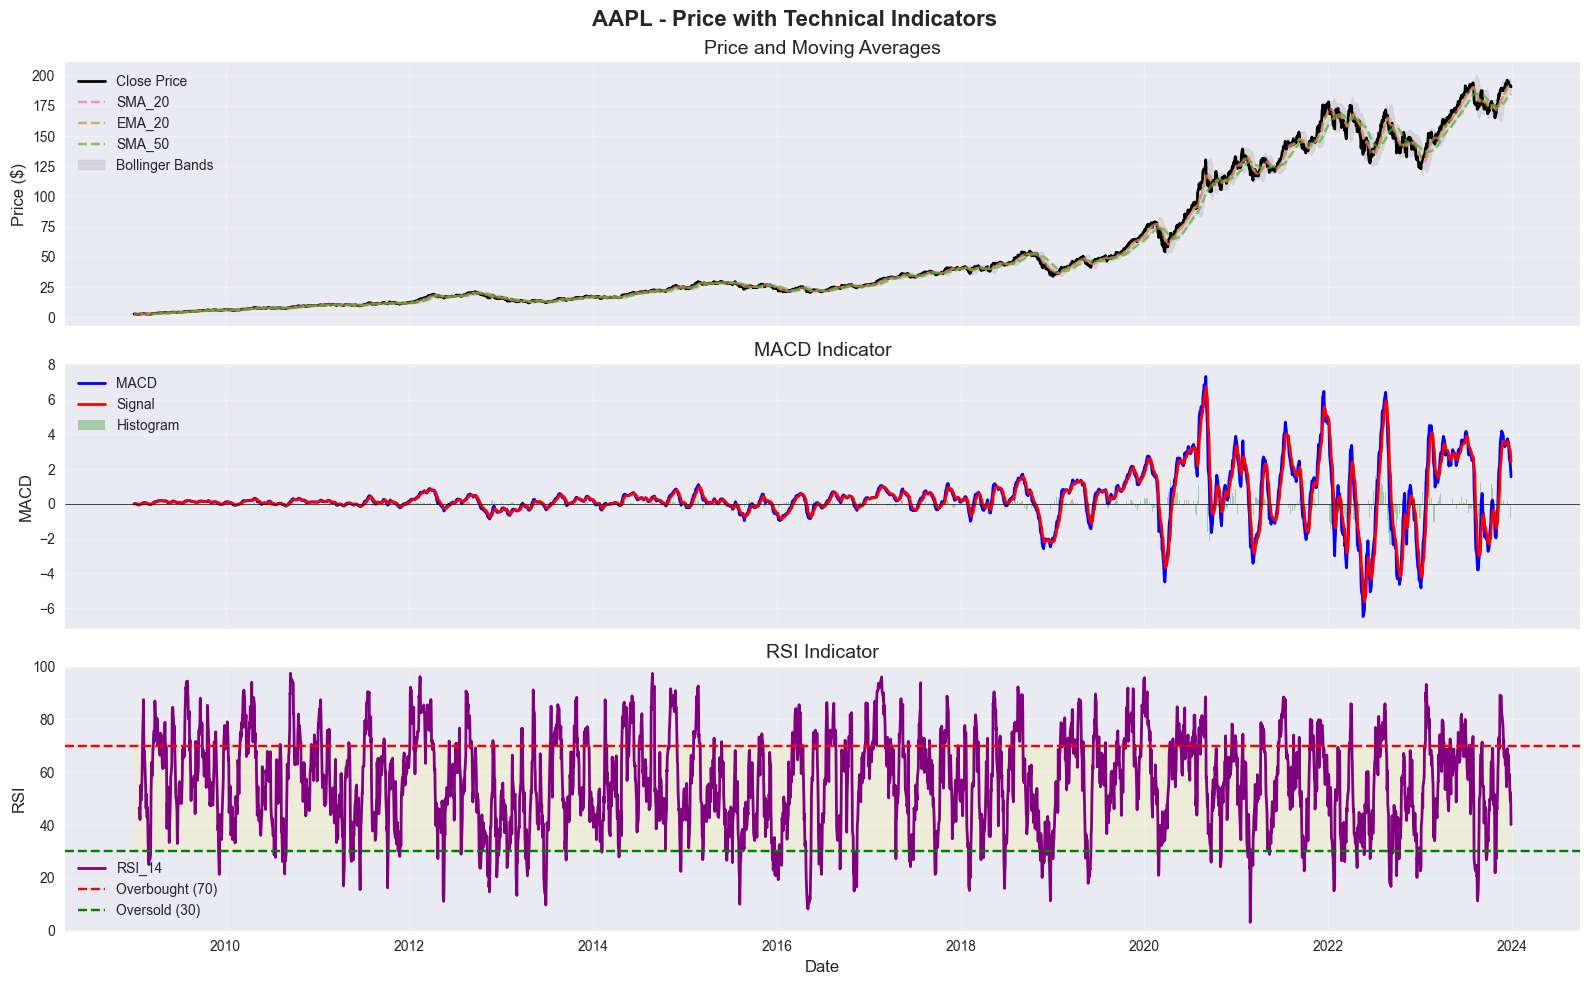

In [5]:
# Set date as index for plotting
plot_df = stock_df.set_index('date') if 'date' in stock_df.columns else stock_df

# Plot 1: Price with Technical Indicators
plot_price_with_indicators(
    plot_df,
    price_column='Close',
    title=f"{TICKER} - Price with Technical Indicators",
    save_path='../outputs/price_with_indicators.png'
)


Figure saved to ../outputs/returns_analysis.png


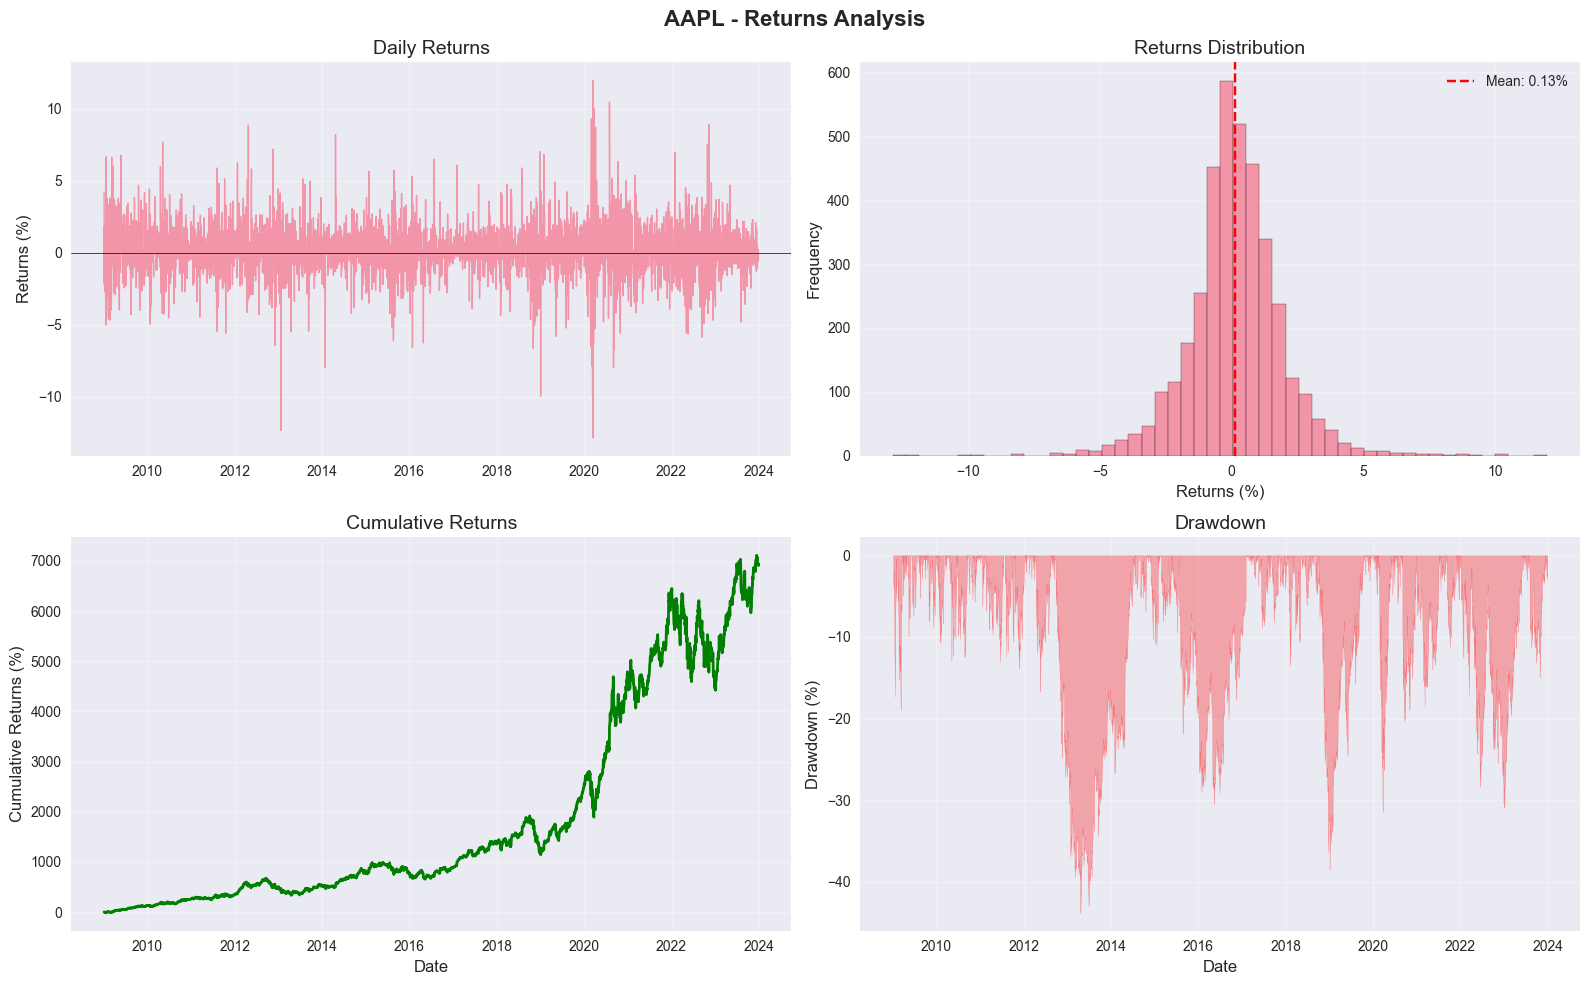

In [6]:
# Plot 2: Returns Analysis
plot_returns_analysis(
    plot_df,
    returns_column='returns',
    title=f"{TICKER} - Returns Analysis",
    save_path='../outputs/returns_analysis.png'
)


Figure saved to ../outputs/risk_metrics.png


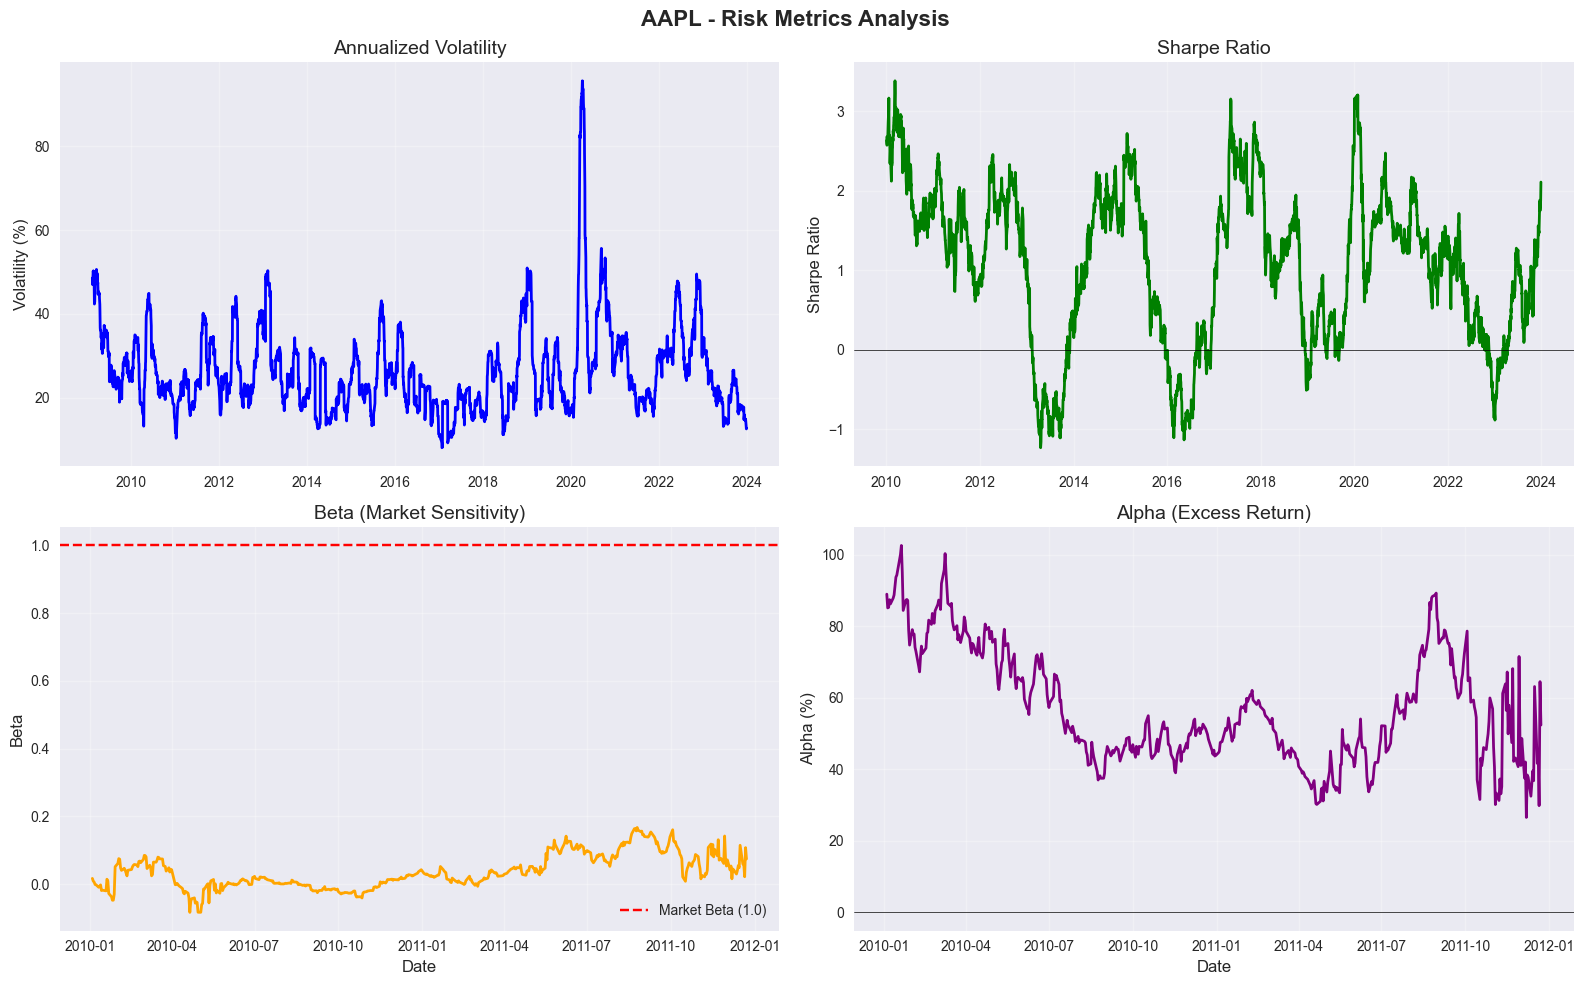

In [7]:
# Plot 3: Risk Metrics
plot_risk_metrics(
    plot_df,
    title=f"{TICKER} - Risk Metrics Analysis",
    save_path='../outputs/risk_metrics.png'
)


Figure saved to ../outputs/indicator_correlation.png


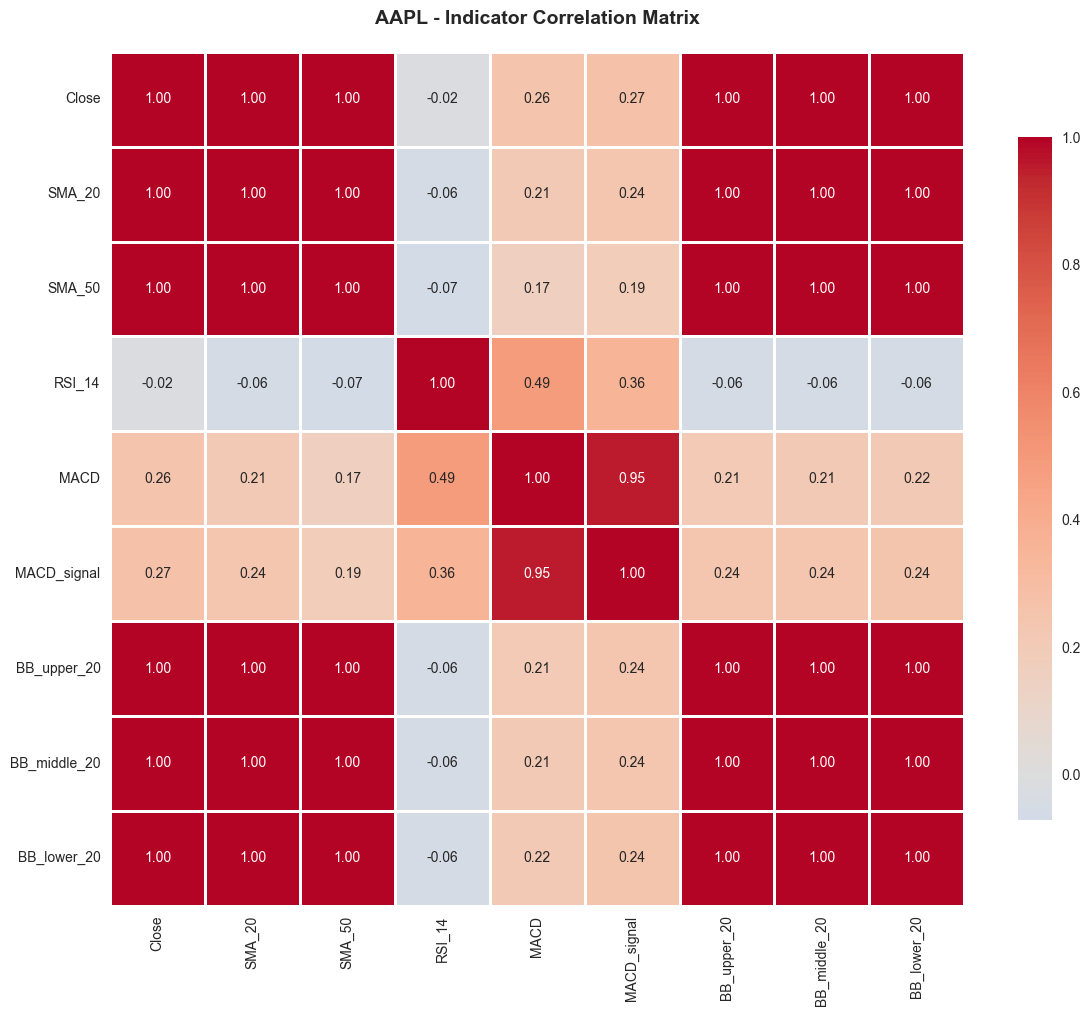

In [8]:
# Plot 4: Indicator Correlation
indicator_columns = [
    'Close', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'MACD_signal',
    'BB_upper_20', 'BB_middle_20', 'BB_lower_20'
]
available_indicators = [col for col in indicator_columns if col in plot_df.columns]

plot_correlation_heatmap(
    plot_df,
    columns=available_indicators,
    title=f"{TICKER} - Indicator Correlation Matrix",
    save_path='../outputs/indicator_correlation.png'
)


## 6. Key Performance Indicators (KPIs)

Calculate and display key performance indicators for the analysis.


In [9]:
# Calculate KPIs
print("Key Performance Indicators (KPIs)")
print("=" * 70)

# 1. Total Return
if 'returns' in stock_df.columns:
    total_return = (1 + stock_df['returns'].dropna()).prod() - 1
    annualized_return = (1 + stock_df['returns'].dropna().mean()) ** 252 - 1
    print(f"\n1. Returns:")
    print(f"   Total Return: {total_return*100:.2f}%")
    print(f"   Annualized Return: {annualized_return*100:.2f}%")

# 2. Volatility
vol_cols = [col for col in stock_df.columns if 'volatility' in col and 'annualized' in col]
if vol_cols:
    current_vol = stock_df[vol_cols[0]].dropna().iloc[-1] if len(stock_df[vol_cols[0]].dropna()) > 0 else None
    avg_vol = stock_df[vol_cols[0]].dropna().mean()
    print(f"\n2. Volatility:")
    print(f"   Current Annualized Volatility: {current_vol*100:.2f}%" if current_vol else "   N/A")
    print(f"   Average Annualized Volatility: {avg_vol*100:.2f}%")

# 3. Sharpe Ratio
sharpe_cols = [col for col in stock_df.columns if 'sharpe_ratio' in col]
if sharpe_cols:
    current_sharpe = stock_df[sharpe_cols[0]].dropna().iloc[-1] if len(stock_df[sharpe_cols[0]].dropna()) > 0 else None
    avg_sharpe = stock_df[sharpe_cols[0]].dropna().mean()
    print(f"\n3. Sharpe Ratio:")
    print(f"   Current Sharpe Ratio: {current_sharpe:.4f}" if current_sharpe else "   N/A")
    print(f"   Average Sharpe Ratio: {avg_sharpe:.4f}")

# 4. Maximum Drawdown
if 'max_drawdown_pct' in stock_df.columns:
    worst_drawdown = stock_df['max_drawdown_pct'].min()
    current_drawdown = stock_df['max_drawdown_pct'].iloc[-1]
    print(f"\n4. Maximum Drawdown:")
    print(f"   Worst Drawdown: {worst_drawdown:.2f}%")
    print(f"   Current Drawdown: {current_drawdown:.2f}%")

# 5. RSI Status
rsi_cols = [col for col in stock_df.columns if col.startswith('RSI_') and 
            not col.endswith('_overbought') and not col.endswith('_oversold')]
if rsi_cols:
    current_rsi = stock_df[rsi_cols[0]].iloc[-1]
    rsi_status = "Overbought" if current_rsi > 70 else "Oversold" if current_rsi < 30 else "Neutral"
    print(f"\n5. RSI Status:")
    print(f"   Current RSI: {current_rsi:.2f}")
    print(f"   Status: {rsi_status}")

# 6. MACD Signal
if 'MACD' in stock_df.columns and 'MACD_signal' in stock_df.columns:
    current_macd = stock_df['MACD'].iloc[-1]
    current_signal = stock_df['MACD_signal'].iloc[-1]
    macd_signal = "Bullish" if current_macd > current_signal else "Bearish"
    print(f"\n6. MACD Signal:")
    print(f"   MACD: {current_macd:.4f}")
    print(f"   Signal: {current_signal:.4f}")
    print(f"   Trend: {macd_signal}")

# 7. Beta (if available)
beta_cols = [col for col in stock_df.columns if 'beta' in col]
if beta_cols:
    current_beta = stock_df[beta_cols[0]].dropna().iloc[-1] if len(stock_df[beta_cols[0]].dropna()) > 0 else None
    avg_beta = stock_df[beta_cols[0]].dropna().mean()
    print(f"\n7. Beta (Market Sensitivity):")
    print(f"   Current Beta: {current_beta:.4f}" if current_beta else "   N/A")
    print(f"   Average Beta: {avg_beta:.4f}")
    if current_beta:
        beta_interpretation = "More volatile than market" if current_beta > 1 else "Less volatile than market" if current_beta < 1 else "Same as market"
        print(f"   Interpretation: {beta_interpretation}")

# 8. Alpha (if available)
alpha_cols = [col for col in stock_df.columns if 'alpha' in col]
if alpha_cols:
    current_alpha = stock_df[alpha_cols[0]].dropna().iloc[-1] if len(stock_df[alpha_cols[0]].dropna()) > 0 else None
    avg_alpha = stock_df[alpha_cols[0]].dropna().mean()
    print(f"\n8. Alpha (Excess Return):")
    print(f"   Current Alpha: {current_alpha*100:.2f}%" if current_alpha else "   N/A")
    print(f"   Average Alpha: {avg_alpha*100:.2f}%")

print("\n" + "=" * 70)


Key Performance Indicators (KPIs)

1. Returns:
   Total Return: 6907.74%
   Annualized Return: 38.35%

2. Volatility:
   Current Annualized Volatility: 12.69%
   Average Annualized Volatility: 26.57%

3. Sharpe Ratio:
   Current Sharpe Ratio: 2.1099
   Average Sharpe Ratio: 1.0813

4. Maximum Drawdown:
   Worst Drawdown: -43.80%
   Current Drawdown: -43.80%

5. RSI Status:
   Current RSI: 40.19
   Status: Neutral

6. MACD Signal:
   MACD: 1.5595
   Signal: 2.4246
   Trend: Bearish

7. Beta (Market Sensitivity):
   Current Beta: inf
   Average Beta: nan
   Interpretation: More volatile than market

8. Alpha (Excess Return):
   Current Alpha: inf%
   Average Alpha: nan%



## 7. Summary and Insights

Provide a comprehensive summary of the analysis findings.


In [10]:
print("Analysis Summary and Insights")
print("=" * 70)

# Data completeness
print(f"\n1. Data Completeness:")
print(f"   - Total data points: {len(stock_df)}")
print(f"   - Date range: {stock_df['date'].min()} to {stock_df['date'].max()}")
print(f"   - Missing values: {stock_df[['Open', 'High', 'Low', 'Close', 'Volume']].isnull().sum().sum()}")

# Indicator accuracy
print(f"\n2. Indicator Accuracy:")
indicators_calculated = len([col for col in stock_df.columns if any(x in col for x in ['SMA', 'EMA', 'RSI', 'MACD', 'BB'])])
print(f"   - Technical indicators calculated: {indicators_calculated}")
metrics_calculated = len([col for col in stock_df.columns if any(x in col for x in ['returns', 'volatility', 'sharpe', 'beta', 'alpha', 'drawdown'])])
print(f"   - Financial metrics calculated: {metrics_calculated}")

# Key findings
print(f"\n3. Key Findings:")
if 'returns' in stock_df.columns:
    positive_days = (stock_df['returns'].dropna() > 0).sum()
    total_days = len(stock_df['returns'].dropna())
    win_rate = (positive_days / total_days * 100) if total_days > 0 else 0
    print(f"   - Win rate: {win_rate:.2f}% ({positive_days}/{total_days} positive days)")

if 'RSI_14' in stock_df.columns:
    current_rsi = stock_df['RSI_14'].iloc[-1]
    if current_rsi > 70:
        print(f"   - RSI indicates overbought conditions (RSI: {current_rsi:.2f})")
    elif current_rsi < 30:
        print(f"   - RSI indicates oversold conditions (RSI: {current_rsi:.2f})")
    else:
        print(f"   - RSI indicates neutral conditions (RSI: {current_rsi:.2f})")

if 'MACD' in stock_df.columns:
    if stock_df['MACD'].iloc[-1] > stock_df['MACD_signal'].iloc[-1]:
        print(f"   - MACD shows bullish momentum")
    else:
        print(f"   - MACD shows bearish momentum")

print("\n" + "=" * 70)
print("\nAnalysis complete! Review the visualizations and KPIs above for insights.")


Analysis Summary and Insights

1. Data Completeness:
   - Total data points: 3774
   - Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00
   - Missing values: 0

2. Indicator Accuracy:
   - Technical indicators calculated: 19
   - Financial metrics calculated: 12

3. Key Findings:
   - Win rate: 53.09% (2003/3773 positive days)
   - RSI indicates neutral conditions (RSI: 40.19)
   - MACD shows bearish momentum


Analysis complete! Review the visualizations and KPIs above for insights.
